In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import math as mt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
finished = 0
initFlag = 0
fpFlag = 0
spFlag = 0

In [ ]:
numPoints = 10
points = np.random.rand(numPoints,2)*20-10
hull = np.array([0,0]).reshape(1,2)

In [ ]:
def findFirstPoint():
  global points, hull, fpFlag
  sorted_indices = np.argsort(points[:, 0])
  points = points[sorted_indices]
  hull = points[0].reshape(1,2)
  fpFlag = 1

In [ ]:
def getAngle(prevPoint, curPoint, checkedPoint):
    if np.all(prevPoint == checkedPoint):
      return 0
    vector1 = prevPoint - curPoint
    vector2 = checkedPoint - curPoint

    dotProduct = np.dot(vector1, vector2)
    dotMagnitude = np.linalg.norm(vector1) * np.linalg.norm(vector2)

    cosineAngle = dotProduct / dotMagnitude
    angleRadians = np.arccos(np.clip(cosineAngle, -1.0, 1.0))

    return angleRadians

In [ ]:
def findNextIndex(prevPoint,curPoint):
  maxAngle = getAngle(prevPoint,curPoint,points[0])
  nextIndex = 0
  for i in range(1,len(points)):
    angle = getAngle(prevPoint, curPoint, points[i])
    if angle > maxAngle:
      maxAngle = angle
      nextIndex = i
  return nextIndex


In [ ]:
def findSecondPoint():
  global nextPoint, prevPoint, hull, points, spFlag
  minAngle = mt.pi
  nextIndex = 0
  for i in range(1,len(points)):
    checkedPoint = points[i]
    root = points[0]
    vector = checkedPoint - root
    dy = vector[1]
    dx = vector[0]
    checkedAngle = np.arctan(dy/dx)
    if checkedAngle < minAngle:
      minAngle = checkedAngle
      nextIndex = i

  nextPoint = points[nextIndex]
  prevPoint = points[0]
  hull = np.vstack((hull, nextPoint))
  points = np.delete(points, nextIndex, axis=0)
  spFlag = 1;


In [ ]:
def findPoint():
  global nextIndex, prevPoint, nextPoint, hull, points, finished
  nextIndex = findNextIndex(prevPoint, nextPoint)
  prevPoint = nextPoint
  nextPoint = points[nextIndex]
  hull = np.vstack((hull, nextPoint))
  points = np.delete(points, nextIndex, axis=0)
  if nextIndex == 0:
      finished = 1


In [ ]:
"""while True:
  nextIndex = findNextIndex(prevPoint, nextPoint)
  prevPoint = nextPoint
  nextPoint = points[nextIndex]
  hull = np.vstack((hull, nextPoint))
  points = np.delete(points, nextIndex, axis=0)
  if nextIndex == 0:
    break"""

In [ ]:
def update(frame):
  global finished, nextIndex, prevPoint, nextPoint, hull, points, initFlag
  # Clear the plot

  plt.clf()

  plt.scatter(points[:, 0], points[:, 1], c='red')

  if fpFlag:
    plt.scatter(hull[:, 0], hull[:, 1], c='blue')
    plt.plot(hull[:, 0], hull[:, 1], c='blue')

  if not finished:
    if not initFlag:
      initFlag = 1
    elif not fpFlag:
      findFirstPoint()
    elif not spFlag:
      findSecondPoint()
    else:
      nextIndex = findNextIndex(prevPoint, nextPoint)
      prevPoint = nextPoint
      nextPoint = points[nextIndex]
      hull = np.vstack((hull, nextPoint))
      points = np.delete(points, nextIndex, axis=0)
      if nextIndex == 0:
        finished = 1


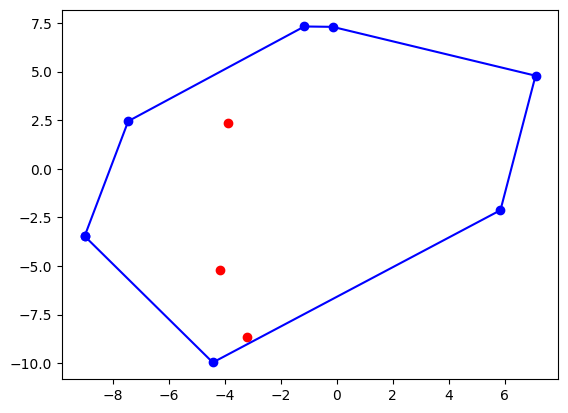

In [ ]:
fig, ax = plt.subplots()

animation = FuncAnimation(fig, update, frames=range(10), interval=1000)
HTML(animation.to_html5_video())


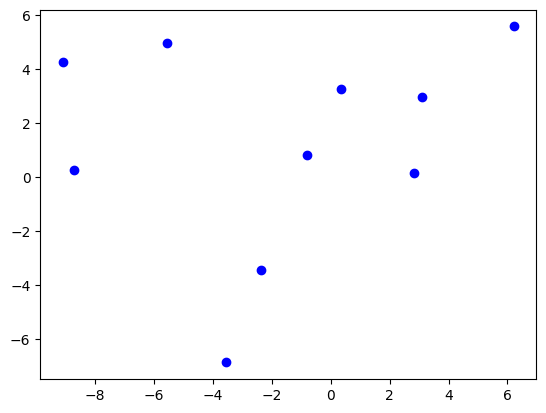

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c='blue')

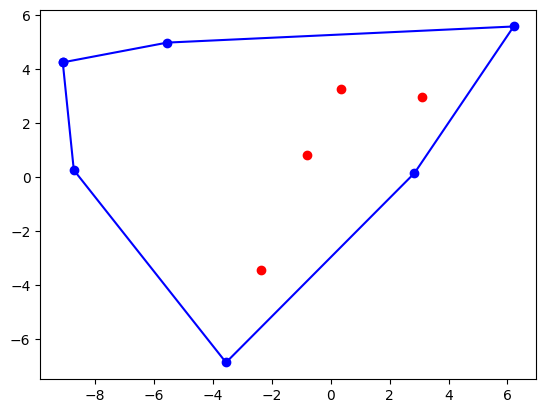

In [ ]:
plt.scatter(points[:, 0], points[:, 1], c='red')
plt.scatter(hull[:, 0], hull[:, 1], c='blue')
plt.plot(hull[:, 0], hull[:, 1], c='blue')